In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 선형 회귀
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('./Apart_Deal.csv')

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315703 entries, 0 to 4315702
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   지역코드    int64  
 1   법정동     object 
 2   거래일     object 
 3   아파트     object 
 4   지번      object 
 5   전용면적    float64
 6   층       object 
 7   건축년도    int64  
 8   거래금액    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 296.3+ MB


In [4]:
df.columns = ['code', 'dong', 'date', 'apart_name','region_num', 'square', 'floor', 'blit_year', 'cost']

In [5]:
df.drop(['dong','apart_name','region_num'],axis=1, inplace=True)

In [6]:
df.head(1)

,code,date,square,floor,blit_year,cost
0,31110,5/30/2020 0:00,135.58,8,1991,26700


In [12]:
# 전처리
df['date'] = pd.to_datetime(df['date'])

In [14]:
df['floor'].unique()

array([8, 2, 11, 7, 5, 10, 9, 13, 22, 12, 4, 20, 15, 3, 6, 1, 14, -1, 39,
       19, 17, 23, 21, 18, 35, 34, 24, 29, 27, 16, 25, 31, 32, 28, 30, 50,
       26, 33, 37, 36, 51, 48, 43, 38, 46, 45, 49, 42, 40, 44, 41, 61, 52,
       60, 55, 54, 64, 56, 47, 58, 53, 57, 59, 62, 66, 63, -2, -3, 65, 68,
       67, 69, 75, 74, 71, 73, 70, 72, 77, 76, 79, 80, 83, 81, '7', '2',
       '10', '21', '6', '15', '4', '3', '18', '8', '9', '1', '17', '22',
       '23', '5', '13', '20', '11', '12', '16', '19', '14', '25', '24',
       '27', '28', '26', '-1', '32', '31', '34', '29', '37', '35', '30',
       '33', '36', '39', '44', '49', '41', '45', '42', '47', '50', '46',
       '48', '52', '38', '43', '40', ' ', -4, 78], dtype=object)

In [21]:
# 층수에서 공백 행 제거
space = df[df['floor']==' '].index
df.drop(space, inplace=True)

In [23]:
df['floor'].astype('int')

0           8
1           2
2          11
3           8
4           7
           ..
4315698     7
4315699     4
4315700     3
4315701     3
4315702     5
Name: floor, Length: 4315702, dtype: int64

In [28]:
df['floor'] = df['floor'].astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4315702 entries, 0 to 4315702
Data columns (total 6 columns):
 #   Column     Dtype         
---  ------     -----         
 0   code       int64         
 1   date       datetime64[ns]
 2   square     float64       
 3   floor      int64         
 4   blit_year  int64         
 5   cost       int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 230.5 MB


In [35]:
X = df.drop(['cost','date'], axis=1)
y = df['cost']

In [36]:
# 훈련/테스트 데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
# weight & bias
print(f'weight : {lr.coef_}')
print(f'bias : {lr.intercept_}')

weight : [ -0.95405739 435.43694287 331.19182146 301.65509352]
bias : -575773.4352134247


In [39]:
# 결정 계수
print(f'R-squre = {lr.score(X_test, y_test)}')

R-squre = 0.438883732623649


In [40]:
# 모델 평가
y_hat = lr.predict(X_test)

print(f'mae = {mean_squared_error(y_test, y_hat)}')

mae = 380475767.8250941


/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


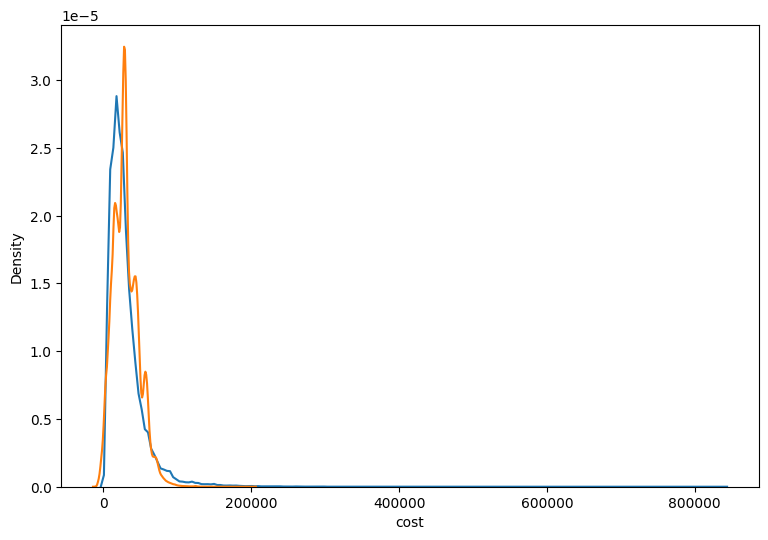

In [48]:
# 시각화
y_X=lr.predict(X)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()

In [44]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

Norm = MinMaxScaler()
X_Norm = Norm.fit_transform(X)

weight : [-37227.31928678 180732.45750645  28813.68846692  18099.30561136]
bias : 7880.004406968361
R-squre = 0.4388837326236463
mae = 380475767.8250959


/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


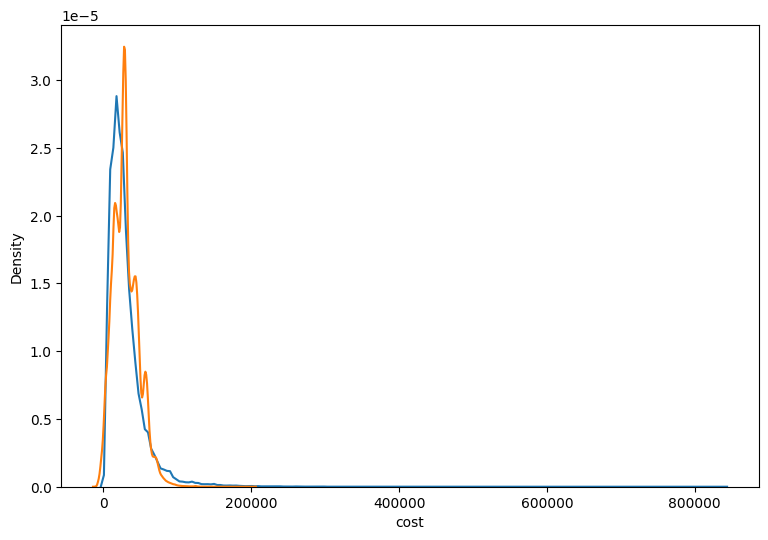

In [47]:
# 훈련/테스트 데이터 나누기

X_train, X_test, y_train, y_test = train_test_split(X_Norm, y, test_size=0.3, random_state=0)

lr_norm = LinearRegression()
lr_norm.fit(X_train, y_train)

# weight & bias
print(f'weight : {lr_norm.coef_}')
print(f'bias : {lr_norm.intercept_}')

# 결정 계수
print(f'R-squre = {lr_norm.score(X_test, y_test)}')

# 모델 평가
y_hat1 = lr_norm.predict(X_test)

print(f'mae = {mean_squared_error(y_test, y_hat1)}')


# 시각화
y_X=lr_norm.predict(X_Norm)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()

In [54]:
from math import sqrt
sqrt(380475767.8250959)

19505.788059575956

In [59]:
np.round(y.describe())

count    4315702.0
mean       30209.0
std        26057.0
min          100.0
25%        15000.0
50%        24000.0
75%        37000.0
max       840000.0
Name: cost, dtype: float64

In [62]:
# 다항식
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train)

lr_poly2 = LinearRegression()
lr_poly2.fit(X_train_poly, y_train)

# weight & bias
print(f'weight : {lr_poly2.coef_}')
print(f'bias : {lr_poly2.intercept_}')

# 결정 계수
X_test_poly = poly.fit_transform(X_test)
print(f'R-squre = {lr_poly2.score(X_test_poly, y_test)}')

# 모델 평가

print(f'mae = {mean_squared_error(y_test, lr_poly2.predict(X_test_poly))}')

weight : [ -49065.32564443  240861.25925363   23421.89841592 -157849.81505026
   54621.77218514 -240439.40849431  -13956.08440333    1485.63150531
  127448.54768304   90034.48033501   31514.0671324    64800.88843133
  -30650.80714582  132794.40989567]
bias : 51914.853936188665
R-squre = 0.5280785620996735
mae = 319995483.78414506


In [66]:
sqrt(319995483.78414506)

17888.417587482272

/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/multi/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


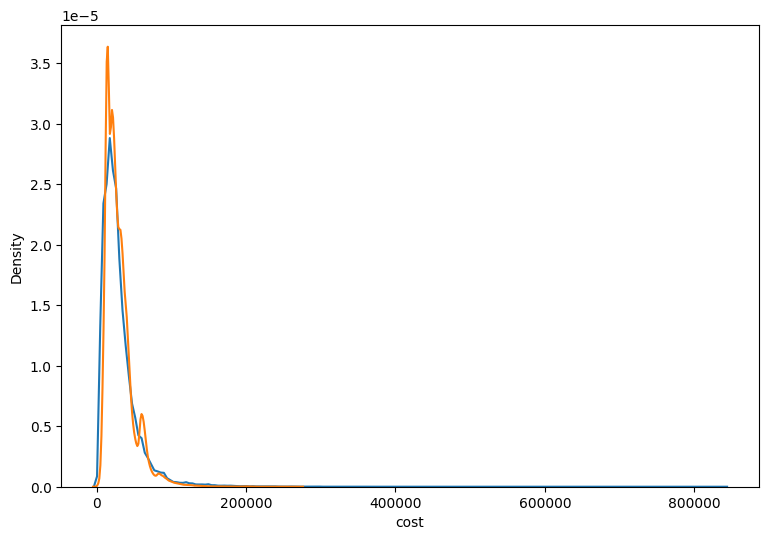

In [65]:
y_X=lr_poly2.predict(X_test_poly)

plt.figure(figsize = (9,6))
ax1=sns.distplot(y, hist = False, label='y')
ax2=sns.distplot(y_X, hist=False, label='y_X', ax=ax1)
plt.show()